# Week 3 - Classification

In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition
import sklearn.feature_extraction
from sklearn import datasets

import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas
import requests
import json
import math
import pickle

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

In [2]:
def exercise_one_clf(clf, dfTrain, dfTest, name, clf_name, full_df):
    print(f"The Classifier is {clf_name}")
    clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
    df = lucem_illud_2020.evaluateClassifier(clf, dfTest).reset_index()
    df['Dataset_Name'] = name
    df['Classifier_Name'] = clf_name
    lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
    lucem_illud_2020.plotMultiROC(clf, dfTest)
    lucem_illud_2020.plotregions(clf, dfTrain)
    return pandas.concat([full_df, df])

def exercise_one(dfTrain, dfTest, name):
    lucem_illud_2020.plotter(dfTrain)
    full_df = pandas.DataFrame(columns=['Dataset_Name', 'Classifier_Name', 'Category', 'Error_Rate', 'AUC', 'Precision', 'Average_Precision', 'Recall'])
    for n, c in [('Naive Bayes', sklearn.naive_bayes.GaussianNB()),
                 ('Linear SVC', sklearn.svm.SVC(kernel = 'linear', probability = True)),
                 ('Polynomial SVC', sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True)),
                 ('KNN', sklearn.neighbors.KNeighborsClassifier(5, weights='distance')),
                 ('Logistic Regression', sklearn.linear_model.LogisticRegression()),
                 ('Decision Tree', sklearn.tree.DecisionTreeClassifier()),
                 ('Random Forest', sklearn.ensemble.RandomForestClassifier()),
                 ('Multi-Layer Perceptron', sklearn.neural_network.MLPClassifier()),
                 ('Gradient Boosting', sklearn.ensemble.GradientBoostingClassifier())]:
        clf = c
        full_df = exercise_one_clf(c, dfTrain, dfTest, name, n, full_df)
    return full_df

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Go back through all of the cells above and generate 10 distinct artificial datasets and classify them with all of the available methods. Add a cell immediately below and describe which classifier(s) worked best with which artificially constructed data source and why. Then go through all of the empirical datasets (i.e., Newsgroups, Senate Small, Senate Large, Email Spam) and classify them with all available methods. Add a second cell immediately below and describe which classifier(s) worked best with which data set and why.

<span style="color:red">***Stretch*** (but also required) Wander through the SKLearn documentation available [here](http://scikit-learn.org/stable/), particularly perusing the classifiers. In cells following, identify and implement a new classifier that we have not yet used (e.g., AdaBoost, CART) on one artificial dataset and one real dataset (used above). Then, in the next cell describe the classifier, detail how it compares with the approaches above, and why it performed better or worse than others.

Please refer to [supplementary notebook](https://github.com/nwrim/Content-Analysis-2020/blob/master/week-3/3-Classification-Nak%20Won%20Rim-Supplement-Ex1.ipynb) to see the codes, plots and the entire results for exercise 1 (It got a little too long so I seperated it).

Overall, I will use AUC as the primary measure for performance, since it takes acount of both true positive rates and false positive rates. 

# Artificially Constructed Data Sources

I will test two dataset for each atrificailly constructed data source. All data except Random() will have two level of noise parameters (0.2, 0.4). For the Random() data, I will just generate two random sets.

## Random() data - 0
In this dataset, all methods show poor performance, which is understandable since there virtually is not pattern whatsoever in the data. Naive Bayes seems to be doing the best job according to AUC (.52) but the difference seems to be marginal at best.

## Random() data - 1
All methods show poor performance again in this dataset for the same reason. Naive Bayes seems to be doing a slightly better job based on AUC (.60) but it is still showing poor performance objectively.

## andSplit() with noise = .2
All methods showed great performance in this dataset with all methods having more than .87 AUC. This is because the decision boundary was linear with small noise, so all classifier was able to find appropriate boundaries. That being said, Random Forest had the best AUC with .90 so we can say that it was the best classifier in this dataset. However, the difference seems to be marginal.

## andSplit() with noise = .4
Classifiers show slightly worse performance than in the previous dataset, but this is to be expected because there were more noise in this dataset. Logistic regression and multi-layer perceptron has the highest AUC (.80), so these two could be seen as the best performing models. If I have to choose one, I will choose logistic regression because generally simpler models are preferred when they show similar performance.

## xorSplit() with noise = .2
Here we some divergence between performance. Since the decision boundaries are non-linear, linear classifiers does not perform well. Multi-layer perceptron seems to be showing best performance (AUC=.90) with Gradient Boosting (AUC=.89) following closely. 

## xorSplit() with noise = .4
Linear classifiers still do a bad job and the better performing models also shows a bit of decline in performance compared to the previous dataset. Multi-layer perceptron seems to be showing best performance (AUC=.87) again.

## targetSplit() with noise = .2
Being unable to handle the non-linear boundary, linear classifiers does a bad job again. Logistic Regression shows especially bad performance with AUC falling below chance level (.375). Naive Bayes shows the best performance based on AUC (.90) in this dataset.

## targetSplit() with noise = .4
Due to the increased noise, non-linear classifiers shows worse performance than the previous dataset again. The best performing classifier is Naive Bayes again (AUC = .82).

## multiBlobs() with noise = .2
All models show near-perfect performance in this dataset. Since there is little noise, the distance between the blobs are relatively large and it is easy to find the decision boundaries. Support Vector Classifier with polynomial kernel seems to show best performance based on AUC by a slight margin, but it will be also reasonable to use simpler classifiers with similar performance such as K-nearest neighbors.

## multiBlobs() with noise = .4
All models show decent performance even with the increased noise. Naive Bayes classifier seems to be doing marginally better job than other classifiers based on AUC, but it would make sense to use other models that perform well.

# Empirical Datasets

## Reddit

In the Reddit dataset, support vector classifier with linear kernel seems to be doing the best job. It shows almost perfect performance across all categories (AUC higher than .96 for all categories). All models seems to be doing a decent job (although Naive Bayes shows relatively poor performance) in classification.

## News Group

In this dataset, support vector classifier with linear kernel, logistic regression and multi-layer perceptron (all three methods have AUC higher than .90 in all categories) seem to be performing best based on AUC. Again, it might be a good idea to use the simplest model - logistic regression.

## Senate Small

For this dataset, many models seems to be showing excellent performance. It looks like support vector classifier with linear kernel is the best with near-perfect performance, but there are many other alternative such as Gradient Boosting or Random Forest.

## Senate Large

Analogous to the smaller counterpart, many models seems to be showing great performance in the Senate (large) dataset too. Gradient Boosting seems to be showing the best performance (virtually perfect job) with ridiculous ROC, but it looks like support vector classifier with linear kernel and random forest is doing almost equally good.

## Spam
It looks like emails and spams are relatively harder to distinguish (which is understandable) - the models showed worse performance compared to other real-world datasets. Naive Bayes is the best model for this dataset, with AUC of .80.

## Stretch: AdaBoost Classifier

For the stretch, I will try out [AdaBoost Classifier from SKLearn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html). I will use the Spam data and the targetsplit() with noise = .4 data to test out this classifier.

The Classifier is AdaBoost


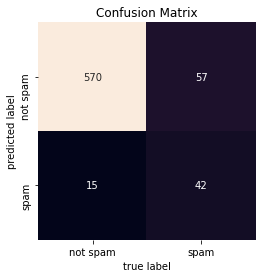

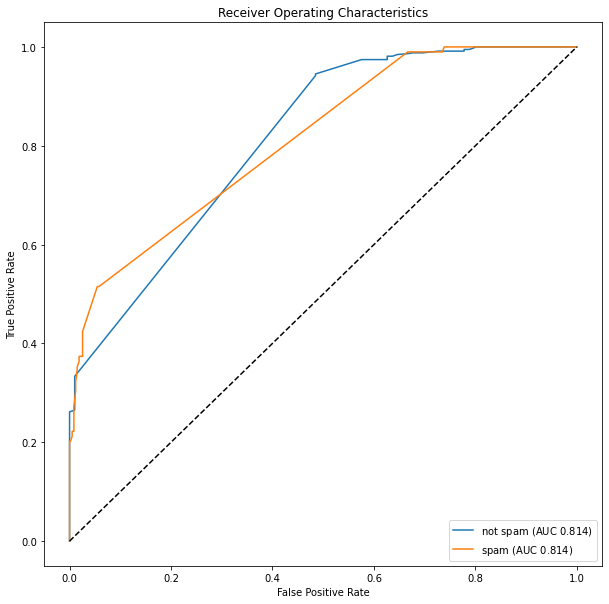

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


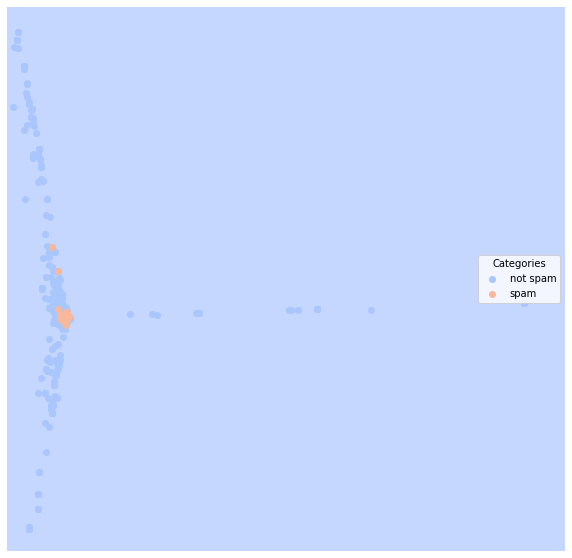

,Dataset_Name,Classifier_Name,Category,Error_Rate,AUC,Precision,Average_Precision,Recall
0,Spam,AdaBoost,not spam,0.105263,0.699301,0.909091,0.907711,0.974359
1,Spam,AdaBoost,spam,0.105263,0.699301,0.736842,0.395933,0.424242


In [23]:
# Spam data
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSpam())
clf = sklearn.ensemble.AdaBoostClassifier()
full_df = pandas.DataFrame(columns=['Dataset_Name', 'Classifier_Name', 'Category', 'Error_Rate', 'AUC', 'Precision', 'Average_Precision', 'Recall'])
exercise_one_clf(clf, dfTrain, dfTest, 'Spam', 'AdaBoost', full_df)

For the spam data, AdaBoosting shows decent performance. It performs better than some methods such as logistic regression Gradient Boosting, but performs worse than some methods like Naive Bayes or Random Forest.

The Classifier is AdaBoost


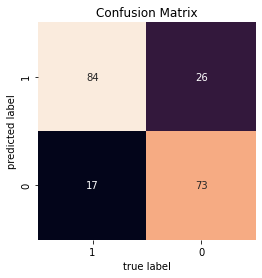

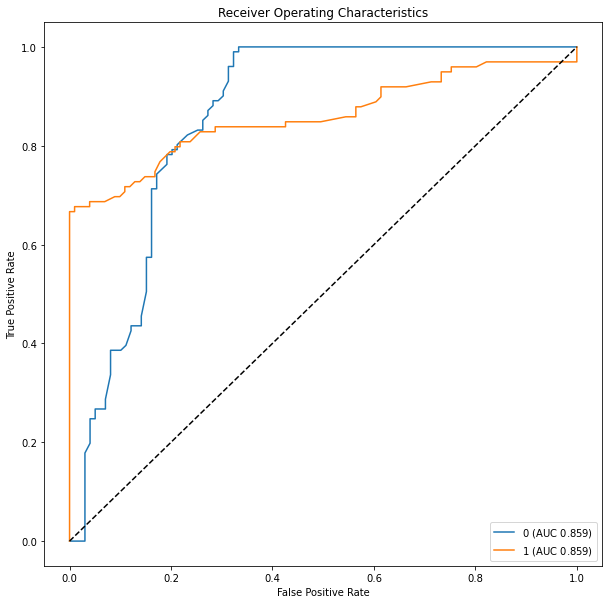

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


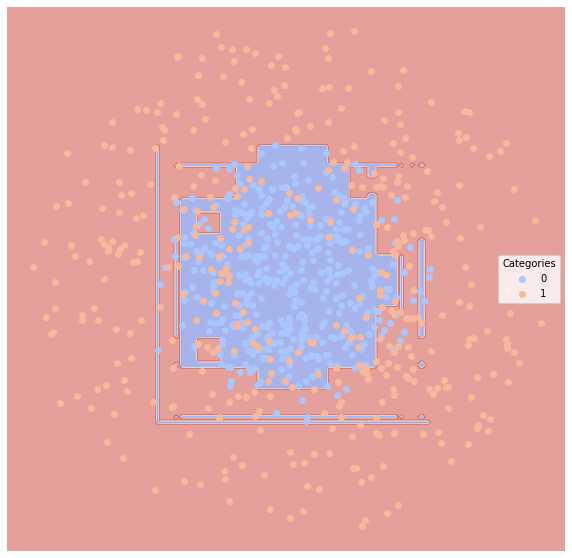

,Dataset_Name,Classifier_Name,Category,Error_Rate,AUC,Precision,Average_Precision,Recall
0,Spam,AdaBoost,0,0.215,0.784528,0.763636,0.720104,0.831683
1,Spam,AdaBoost,1,0.215,0.784528,0.811111,0.728092,0.737374


In [75]:
# targetsplit with noise = .4
noise = .4
# dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.targetSplit(noise)) - I used the same dataset with codes in the other notebook
clf = sklearn.ensemble.AdaBoostClassifier()
full_df = pandas.DataFrame(columns=['Dataset_Name', 'Classifier_Name', 'Category', 'Error_Rate', 'AUC', 'Precision', 'Average_Precision', 'Recall'])
exercise_one_clf(clf, dfTrain, dfTest, 'Spam', 'AdaBoost', full_df)

For the targetsplit() with noise = .4 data, AdaBoost Classifier performs quite well. It's AUC (.78) is only slightly below the best performing model (naive bayes: AUC=.82)

 AdaBoost Classifier is Boosting algorithm that fits a sequence of weak learners. Specifically, weights for the instances that were classified wrong in the previous sequence receives more weight in the next iteration so that the weak learner can focus more on cases that are difficult.
The AdaBoost Classifier is similar to the GradientBoosting Classifier since they share the same ensemble method of boosting. 

In both spam dataset and targetSplit() with noise =.4 dataset, AdaBoosting was not the best model but showed decent performance. Compared to another Boosting classifier (GradientBoosting), it performed better in the spam data but worse in the targetSplit() data. This difference might be related to the different boosting method they use, but it looks like the difference is small.

Overall, AdaBoosting looks like another promising classifier to try out, showing good performance in non-linear datasets.

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">In the cells immediately following, perform Logistic and Naïve Bayes classification (binary or multinomial) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project (e.g., these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week). Visualize the confusion matrix for training and testing sets. Calculate precision, recall, the F-measure, and AUC, then perform an ROC visualization. How do these classifiers perform? Exrapolate codes from these models to all uncoded data.


For the final project, I am considering to work on abstracts of psychology articles. I am talking with Professor Evans on how to get the data, but I do not have access to the data yet.

Therefore, I will use some kind of a toy dataset for this notebook. The toy dataset is the abstracts scraped from [PsyArXiv](https://psyarxiv.com/), which is a preprint site for works related to psychology. I will only used the articles that has a peer-review DOI attached to it. This means that the preprint (or the later version of it) was accepted in a peer-reviewed journal, so we can ensure that the article passed some standards in the field. For each preprint, the authors label their work's "discipline". Since each authors are the greatest experts on their work, I will use this labels as annotation to train the models. Specifically, I will test if we can build a model that distinguishes abstracts of article labeled "cognitive psychology" from abstracts of articles labeled "Social and Personality Psychology". The data consists of 856 abstracts, with 370 articles labeled "Cognitive Psychology" and 486 articles labeled "Social and Personality Psychology". I expect that the models will perform quite well, since I feel like that the two fields use quite different terminologies based on my past experience.

Also, due to the way I subsetted the data, there is no extrapolated (uncoded) data in my dataset. I will only utilize the training/testing data.

First I load, subset and label the data:

In [53]:
# load the original dataframe
with open('../../psyarxiv.pkl', 'rb') as f:
    psy_df = pickle.load(f)
# only subset articles that has a peer-review article doi
psy_df = psy_df[~psy_df['pr_doi'].isna()]
# extract the binomial classes: "Cognitive Psychology" vs "Social and Personality Psychology"
cog_psy_df = psy_df[psy_df['disciplines'].apply(lambda x: 'Cognitive Psychology' in x and 'Social and Personality Psychology' not in x )]
soc_psy_df = psy_df[psy_df['disciplines'].apply(lambda x: 'Social and Personality Psychology' in x and 'Cognitive Psychology' not in x)]
# create binomial label
cog_psy_lst = [True] * len(cog_psy_df) + [False] * len(soc_psy_df)
#subset only the relevant columns
abstracts_lst = list(cog_psy_df['abstract']) + list(soc_psy_df['abstract'])
psy_df = pandas.DataFrame()
psy_df['text'] = abstracts_lst
psy_df['category'] = cog_psy_lst

Then I tokenize and normalize the abstracts:

In [54]:
psy_df['tokenized_text'] = psy_df['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
psy_df['normalized_text'] = psy_df['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

Now I split the data to training set and test set:

In [55]:
holdBackFraction = .2
train_data_df, test_data_df = lucem_illud_2020.trainTestSplit(psy_df, holdBackFraction=holdBackFraction)

Converting the texts in training data to a tf-idf vectors and storing in the dataframe:

In [56]:
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_data_df['text'])
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

## Logistic Regression

I will first try the logistic regression with PCA approach. The example in the notebook did not show such great performance, but maybe I would have better luck.

In [57]:
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_data_df['vect'], axis=0))
# store it to dataframe
train_data_df['pca'] = [r for r in reduced_data]

Let's quickly visualize the categories using the first two PCA:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


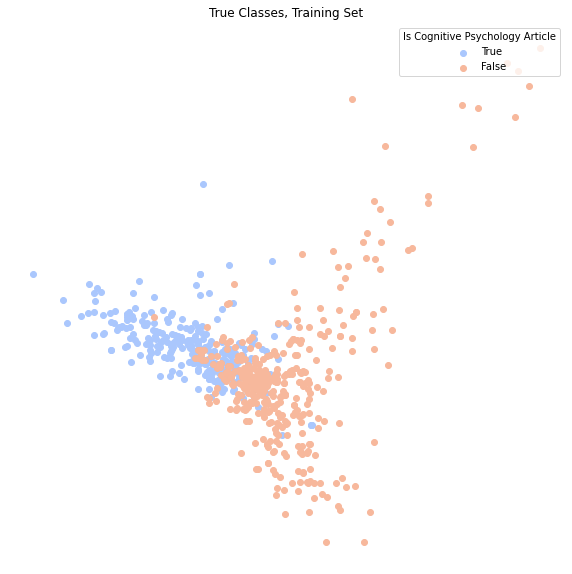

In [58]:
fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors = 2)

#Plot Cog Psy
a = np.stack(train_data_df[train_data_df['category']]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "True")

#Plot Social Psy
a = np.stack(train_data_df[train_data_df['category'].eq(False)]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "False")
    
ax.legend(loc = 'upper right', title = 'Is Cognitive Psychology Article')
plt.title('True Classes, Training Set')
plt.show()

Also a scree plot to see where is the "elbow" in the PCAs:

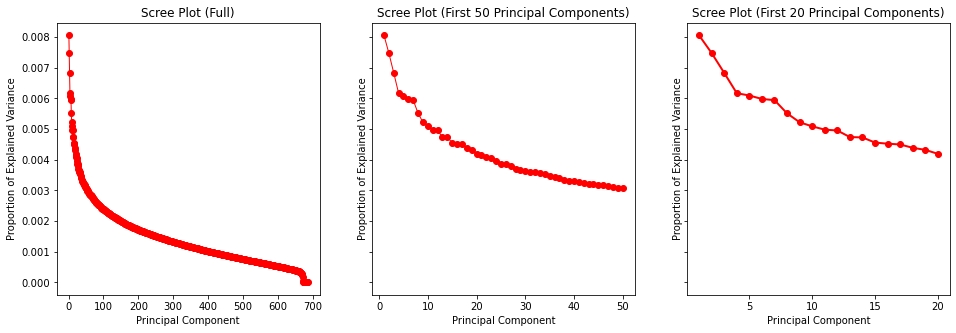

In [59]:
n = len(train_data_df)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (16, 5), sharey=True)

eigen_vals = np.arange(n) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=1)
ax1.set_title('Scree Plot (Full)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(50) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:50], 'ro-', linewidth=1)
ax2.set_title('Scree Plot (First 50 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(20) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:20], 'ro-', linewidth=2)
ax3.set_title('Scree Plot (First 20 Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')

plt.show()

It looks like 10 could be enough for adequate performance, since there is an "elbow" around 10~20 in the second plot. Let's fit the model using first 10 PCs:

In [60]:
train_data_df['pca_reduced_10'] = train_data_df['pca'].apply(lambda x: x[:10])

In [61]:
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The accuracy in the training set is:

In [62]:
logistic.score(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

0.8540145985401459

The accuracy in the test set is:

In [63]:
#Create vectors
TFVects_test = TFVectorizer.transform(test_data_df['text'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
reduced_data_test = pca.transform(np.stack(test_data_df['vect'], axis=0))
test_data_df['pca'] = [r for r in reduced_data_test]
test_data_df['pca_reduced_10'] = test_data_df['pca'].apply(lambda x: x[:10])

#Test
logistic.score(np.stack(test_data_df['pca_reduced_10'], axis=0), test_data_df['category'])

0.8128654970760234

Overall, it looks like logistic regression with tf-idf matrix seems to be doing quite well with 10 principle components.

Second, let's try a logistic regression with L1 penalty.

First we train the model using the training set and calculate the accuracy:

In [64]:
logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l2')
logistic_l1.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
print(logistic_l1.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))

0.9766423357664233


We have near perfect accuracy in the training set! Now let'see the accuracy in the test set:

In [65]:
print(logistic_l1.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

0.8596491228070176


The accuracy shows a quite large decline, but still better than the PCA logistic regression.

Since the logistic regression with penalty seems to be doing a better job, I will use this for plotting confusion matrix, calculating precision, recall, the F-measure, and AUC and plotting ROC.

First the confusion matrices:

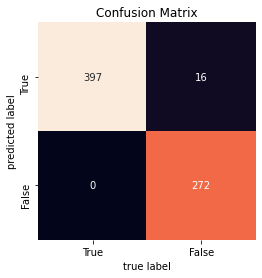

In [152]:
lucem_illud_2020.plotConfusionMatrix(logistic_l1, train_data_df)

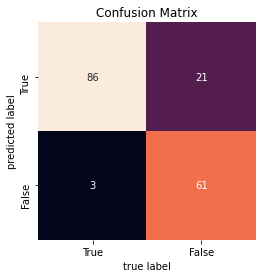

In [66]:
lucem_illud_2020.plotConfusionMatrix(logistic_l1, test_data_df)

Now the metrics:

In [67]:
lucem_illud_2020.metrics.evaluateClassifier(logistic_l1, test_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.140351,0.855097,0.803738,0.794190,0.966292
True,0.140351,0.855097,0.953125,0.831839,0.743902


Let's see the overall scores instead of by category, too:

In [70]:
test_data_df['logistic_predict'] = logistic_l1.predict(np.stack(test_data_df['vect'], axis=0))
print('Precision:', sklearn.metrics.precision_score(test_data_df['category'], test_data_df['logistic_predict']))
print('Recall:', sklearn.metrics.recall_score(test_data_df['category'], test_data_df['logistic_predict']))
print('F1:', sklearn.metrics.f1_score(test_data_df['category'], test_data_df['logistic_predict']))
print('AUC:', sklearn.metrics.roc_auc_score(test_data_df['category'], test_data_df['logistic_predict']))

Precision: 0.953125
Recall: 0.7439024390243902
F1: 0.8356164383561643
AUC: 0.8550972869279255


Finally the ROC curve:

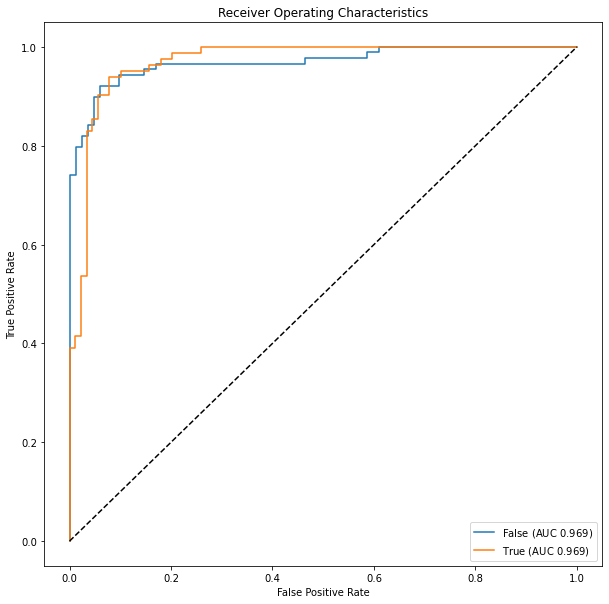

In [69]:
lucem_illud_2020.plotMultiROC(logistic_l1, test_data_df)

Overall, there seems to be slightly high false positive rate (Social and Personality Psychology abstracts being classified as Cognitive Psychology abstracts) for the model.

## Naive Bayes

Now let's try naive Bayes classifier with tf-idf vectors:

In [76]:
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

The accuracy of naive Bayes classifier for training set and test set are:

In [77]:
print("Training set ACC:", naiveBayes.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print("Testing set ACC:", naiveBayes.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

Training set ACC: 0.964963503649635
Testing set ACC: 0.8538011695906432


It shows similar performance with the logistic regression classifier.

Let's take a look at the confusion matrices:

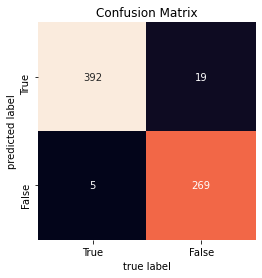

In [153]:
# traning data
lucem_illud_2020.plotConfusionMatrix(naiveBayes, train_data_df)

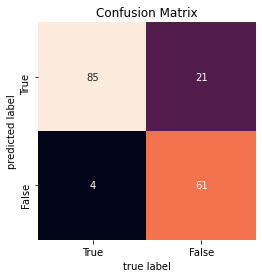

In [154]:
# testing data
lucem_illud_2020.plotConfusionMatrix(naiveBayes, test_data_df)

the metrics:

In [80]:
lucem_illud_2020.metrics.evaluateClassifier(naiveBayes, test_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.146199,0.849479,0.801887,0.789239,0.955056
True,0.146199,0.849479,0.938462,0.820931,0.743902


In [82]:
test_data_df['nb_predict'] = naiveBayes.predict(np.stack(test_data_df['vect'], axis=0))
print('Precision:', sklearn.metrics.precision_score(test_data_df['category'], test_data_df['nb_predict']))
print('Recall:', sklearn.metrics.recall_score(test_data_df['category'], test_data_df['nb_predict']))
print('F1:', sklearn.metrics.f1_score(test_data_df['category'], test_data_df['nb_predict']))
print('AUC:', sklearn.metrics.roc_auc_score(test_data_df['category'], test_data_df['nb_predict']))

Precision: 0.9384615384615385
Recall: 0.7439024390243902
F1: 0.8299319727891157
AUC: 0.8494793093998356


and ROC curve:

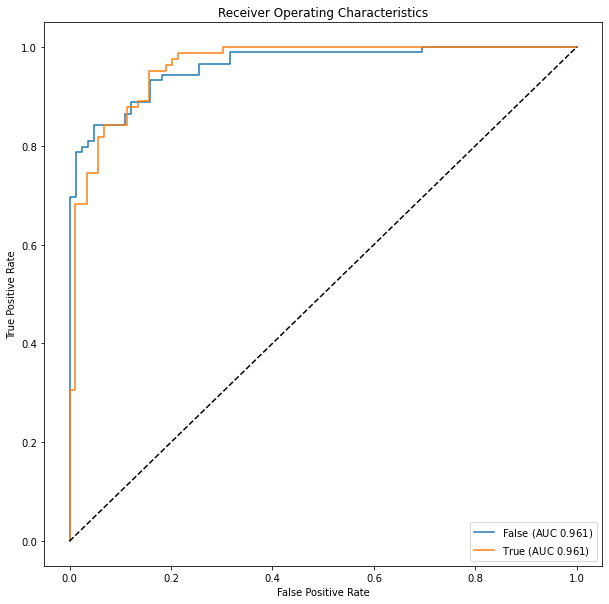

In [83]:
lucem_illud_2020.plotMultiROC(naiveBayes, test_data_df)

It looks like naive bayes also shares the relatively high false positive rate problem with the logistic regression classifier, but I think this is good performance overall.

Lastly, let's look at the most influential words (this was not required but I am genuinely interested):

In [84]:
#Top indices
trueVals, falseVals = naiveBayes.feature_log_prob_

words_dict = {
    'CogPsy' : [],
    'CogPsy_log_prob' : [],
    'SocialPsy' : [],
    'SocialPsy_log_prob' : [],
}

for i, prob in sorted(enumerate(trueVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['CogPsy'].append(TFVectorizer.get_feature_names()[i])
    words_dict['CogPsy_log_prob'].append(prob)

for i, prob in sorted(enumerate(falseVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['SocialPsy'].append(TFVectorizer.get_feature_names()[i])
    words_dict['SocialPsy_log_prob'].append(prob)
    
pandas.DataFrame(words_dict)

,CogPsy,CogPsy_log_prob,SocialPsy,SocialPsy_log_prob
0,analysis,-1.754855,task,-1.393215
1,individuals,-1.754855,memory,-1.495494
2,behavior,-1.769454,experiment,-1.575536
3,personality,-1.814574,use,-1.626830
4,support,-1.845827,experiments,-1.644529
5,current,-1.861827,information,-1.662548
6,measures,-1.894617,language,-1.718637
7,psychological,-1.911424,learning,-1.757858
8,sample,-1.911424,performance,-1.757858
9,group,-1.928518,tasks,-1.757858


## <span style="color:red">*Exercise 3*</span>

<span style="color:red">In the cells immediately following, perform decision tree and random forest classification (binary, multinomial or continuous) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. As with ***Exercise 2***, these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week. Visualize the classification of data points. Calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Now build an ensemble classifier by bagging trees into a random forest. Visualize the result. How do these classifiers perform? What does ensemble learning do?

I will continue to use the PsyArXiv data I was using in exercise 2.

## Decision Trees

First let's fit the decision trees (I use the same parameters from the original notebook):

In [86]:
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=4, random_state=0)
clf_tree.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Visualizing the classification:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


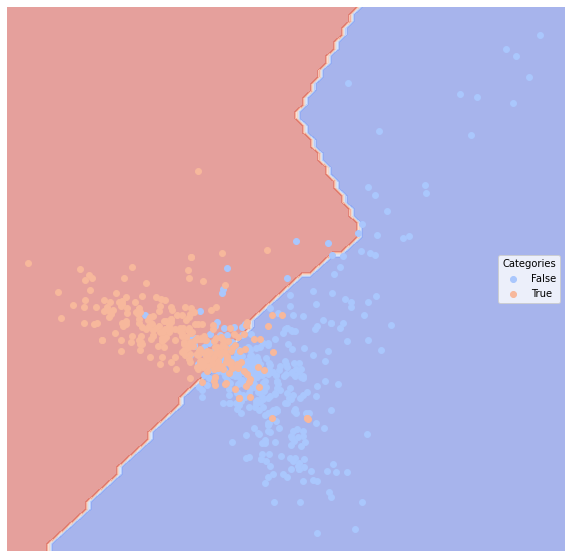

In [87]:
# training data
lucem_illud_2020.plotregions(clf_tree, train_data_df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


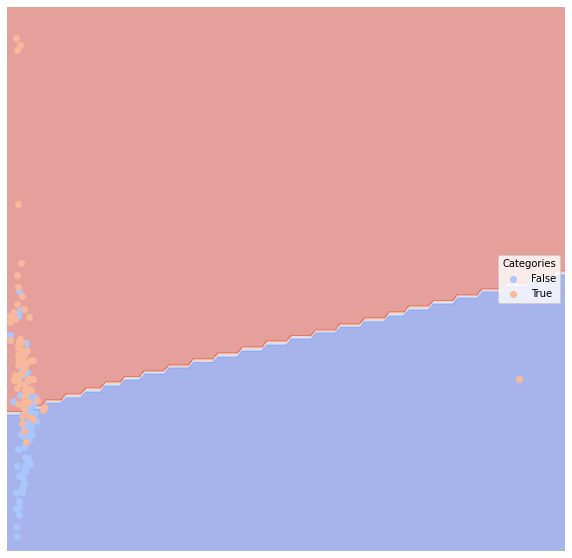

In [155]:
# test data
lucem_illud_2020.plotregions(clf_tree, test_data_df)

Now let's look at the accuracy in the training set and the test set:

In [89]:
print("Training set ACC:", clf_tree.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print("Testing set ACC:", clf_tree.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

Training set ACC: 0.7883211678832117
Testing set ACC: 0.7426900584795322


it looks like the decision tree is doing a little worse than the logistic regression or naive Bayes classifiers. Let's see if we can increase the accuracy by allowing more depth (I guess this should be done in cross-validation kind of way in real research)

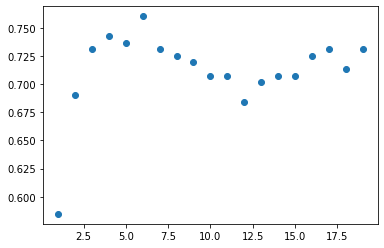

In [94]:
depthvec = []
scorevec = []
for i in range(1,20):
    tree = sklearn.tree.DecisionTreeClassifier(max_depth=i,random_state=0)
    tree.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
    score = sklearn.metrics.accuracy_score(test_data_df['category'], tree.predict(np.stack(test_data_df['vect'], axis = 0)))
    depthvec.append(i)
    scorevec.append(score)
plt.scatter(depthvec,scorevec)
plt.show()

It looks like the maximal test set accuracy we could get from decision tree is around .75 even if we allow more depth. I will stick to the original depth (4) for the plotting and the calculation of metrics.

First let's take a look at the confusion matrix.

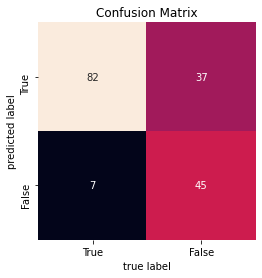

In [95]:
lucem_illud_2020.plotConfusionMatrix(clf_tree, test_data_df)

and the relevant metrics:

In [108]:
lucem_illud_2020.evaluateClassifier(clf_tree, test_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.25731,0.735064,0.689076,0.675814,0.921348
True,0.25731,0.735064,0.865385,0.691280,0.548780


In [98]:
test_data_df['tree_predict'] = clf_tree.predict(np.stack(test_data_df['vect'], axis=0))
print('Precision:', sklearn.metrics.precision_score(test_data_df['category'], test_data_df['tree_predict']))
print('Recall:', sklearn.metrics.recall_score(test_data_df['category'], test_data_df['tree_predict']))
print('F1:', sklearn.metrics.f1_score(test_data_df['category'], test_data_df['tree_predict']))
print('AUC:', sklearn.metrics.roc_auc_score(test_data_df['category'], test_data_df['tree_predict']))

Precision: 0.8653846153846154
Recall: 0.5487804878048781
F1: 0.6716417910447762
AUC: 0.7350644012058098


Finally we could plot the ROC:

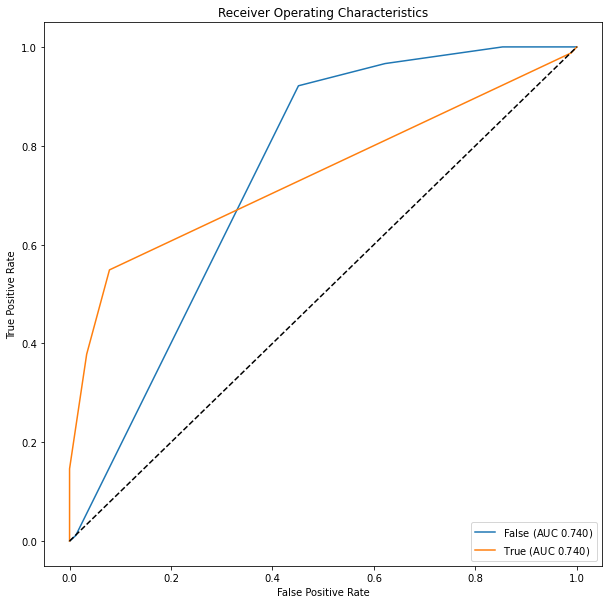

In [100]:
lucem_illud_2020.plotMultiROC(clf_tree, test_data_df)

We can see from the metrics and the plots that decision tree seem to be performing worse than the other two classifier we saw before. Now let's see if bagging the trees will imporve the performance.

## Bagging

I will fit a Bagging classifier using the same data (with the same parameters in the orginal notebook):

In [101]:
bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) #Each tree uses up to 80% of the data
bag.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=19,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=0,
     

Visualizing the classification by the Bagging classifier again:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


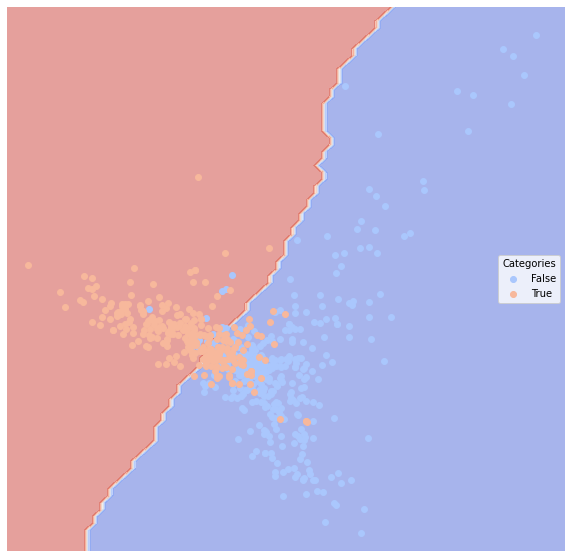

In [102]:
# training data
lucem_illud_2020.plotregions(bag, train_data_df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


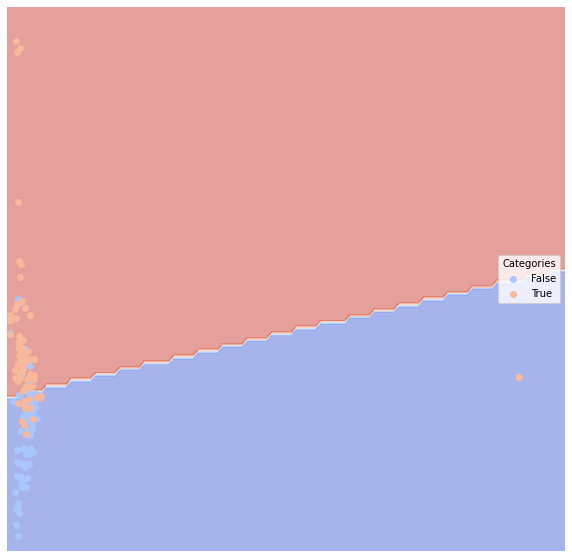

In [156]:
# test data
lucem_illud_2020.plotregions(bag, test_data_df)

It looks like the boundary is quite similar to that of the decision tree classifier. Let's see if there is an improvement.

First let's take a look at accuracy:

In [104]:
print("Training set ACC:", bag.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print("Testing set ACC:", bag.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

Training set ACC: 0.9678832116788321
Testing set ACC: 0.7953216374269005


Bagging reaches about the same training set accuracy with the logistic regression classifier, but it's test accuracy still is a bit lower. However, it does seem to improved from the decision tree classifier a bit.

Let's plot the confusion matrix, ROC and calculate the metrics again:

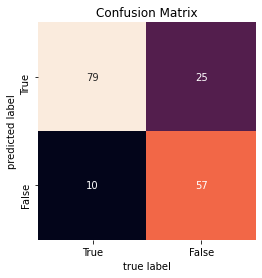

In [115]:
lucem_illud_2020.plotConfusionMatrix(bag, test_data_df)

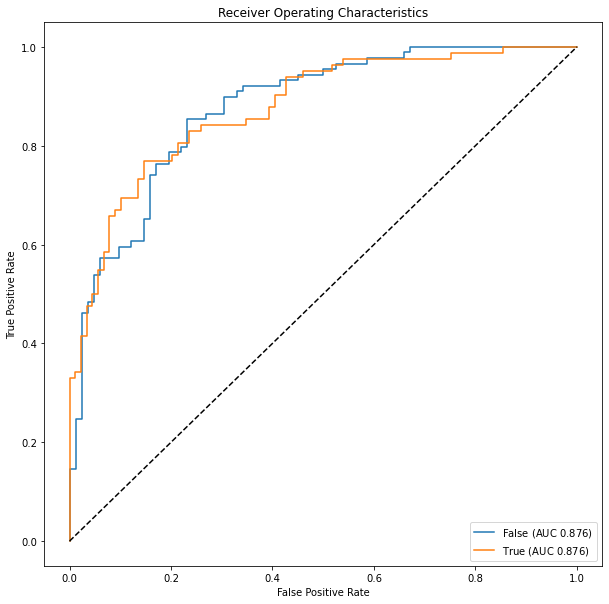

In [105]:
lucem_illud_2020.plotMultiROC(bag, test_data_df)

In [109]:
lucem_illud_2020.evaluateClassifier(bag, test_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.204678,0.791381,0.759615,0.732745,0.887640
True,0.204678,0.791381,0.850746,0.737571,0.695122


In [107]:
test_data_df['bag_predict'] = bag.predict(np.stack(test_data_df['vect'], axis=0))
print('Precision:', sklearn.metrics.precision_score(test_data_df['category'], test_data_df['bag_predict']))
print('Recall:', sklearn.metrics.recall_score(test_data_df['category'], test_data_df['bag_predict']))
print('F1:', sklearn.metrics.f1_score(test_data_df['category'], test_data_df['bag_predict']))
print('AUC:', sklearn.metrics.roc_auc_score(test_data_df['category'], test_data_df['bag_predict']))

Precision: 0.8507462686567164
Recall: 0.6951219512195121
F1: 0.7651006711409395
AUC: 0.7913812003288572


We could see that all metric except Precision improved in using bagging classifier. As we discussed in the lecture last week, ensemble methods aggregate the smaller methods (in this case decision tree) to provide more accurate (less variant) results. We can see that bagging (a kind of ensemble method) trees together resulted in improved performance.

Finally, I will try out the sklearn Random Forest classifier (although bagging is a kind of Random Forest). Since this was not included in the original notebook, I will not comment on the codes - but I do note that the performance is a little better.

## Random Forest

In [111]:
clf_rf = sklearn.ensemble.RandomForestClassifier(random_state=0)
clf_rf.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


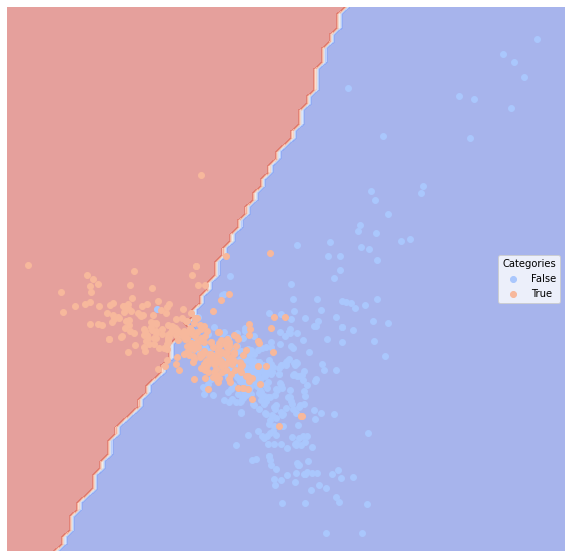

In [112]:
# training data
lucem_illud_2020.plotregions(clf_rf, train_data_df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


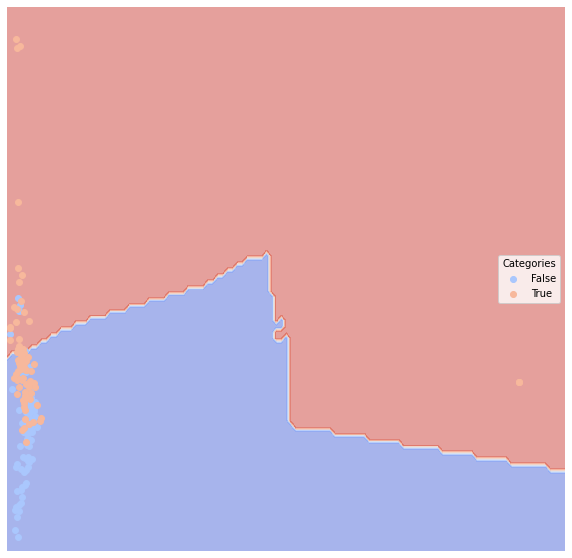

In [157]:
# test data
lucem_illud_2020.plotregions(clf_rf, test_data_df)

In [113]:
print("Training set ACC:", clf_rf.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print("Testing set ACC:", clf_rf.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

Training set ACC: 0.997080291970803
Testing set ACC: 0.847953216374269


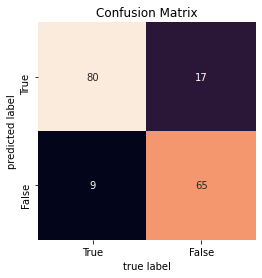

In [114]:
lucem_illud_2020.plotConfusionMatrix(clf_rf, test_data_df)

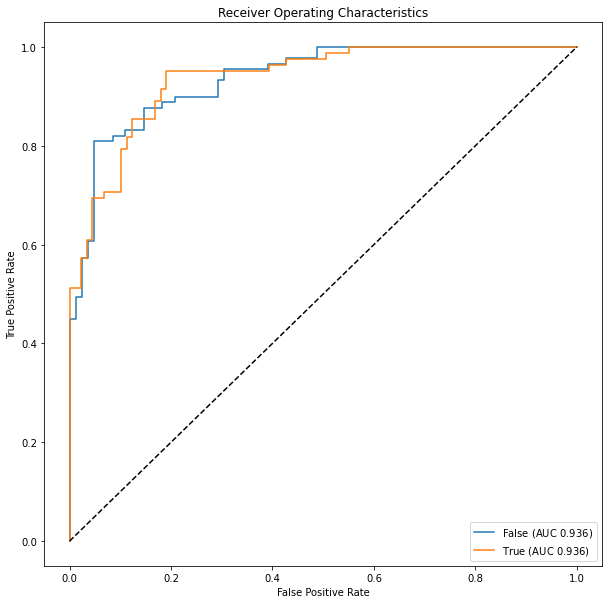

In [116]:
lucem_illud_2020.plotMultiROC(clf_rf, test_data_df)

In [117]:
lucem_illud_2020.evaluateClassifier(clf_rf, test_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.152047,0.84578,0.824742,0.793973,0.898876
True,0.152047,0.84578,0.878378,0.795691,0.792683


In [118]:
test_data_df['rf_predict'] = clf_rf.predict(np.stack(test_data_df['vect'], axis=0))
print('Precision:', sklearn.metrics.precision_score(test_data_df['category'], test_data_df['rf_predict']))
print('Recall:', sklearn.metrics.recall_score(test_data_df['category'], test_data_df['rf_predict']))
print('F1:', sklearn.metrics.f1_score(test_data_df['category'], test_data_df['rf_predict']))
print('AUC:', sklearn.metrics.roc_auc_score(test_data_df['category'], test_data_df['rf_predict']))

Precision: 0.8783783783783784
Recall: 0.7926829268292683
F1: 0.8333333333333334
AUC: 0.8457796656618252


## <span style="color:red">*Exercise 4*</span>

<span style="color:red">In the cells immediately following, perform and visualize k-nearest neighbor classification using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. Visualize the classification of data points and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Articulate how the *k*-nearest neighbor approach relates to *k*-means clustering explored in ***week 3***?

# K-Nearest Neighbors

I will continue to use the same dataset.

I will use the paramaters in the original notebook to fit the models:

In [119]:
clf_knearest = sklearn.neighbors.KNeighborsClassifier(15, weights="uniform")
clf_knearest.fit(np.stack(train_data_df['vect'], axis = 0), train_data_df['category'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

Visualzing the classification of the model same way as we did till now:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


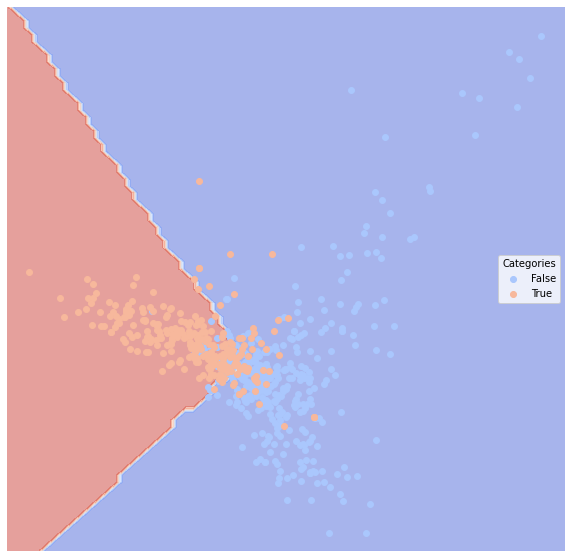

In [121]:
# training data
lucem_illud_2020.plotregions(clf_knearest, train_data_df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


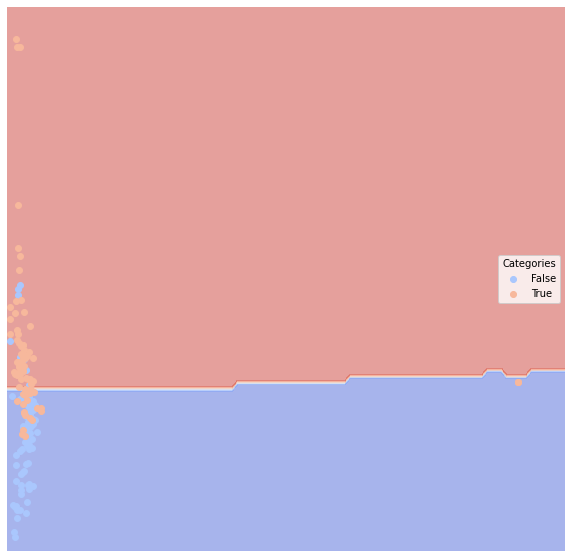

In [158]:
# test data
lucem_illud_2020.plotregions(clf_knearest, test_data_df)

Let's see the accuracy for both training set and test set:

In [122]:
print("Training set ACC:", clf_knearest.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print("Testing set ACC:", clf_knearest.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

Training set ACC: 0.8978102189781022
Testing set ACC: 0.9122807017543859


We can actually see that this simple method performs better in the test set than the (relatively) complex methods discussed above! Even more, the test set accuracy is higher than training set accuracy - perhaps simple was the best. KNN having lower training set accuracy than those of other models implies that there were some level of overfitting happening in the previous models.

Let's plot the confusion matrix, ROC and calculate relevant metrics like we did for all methods till now:

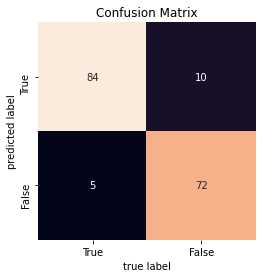

In [123]:
lucem_illud_2020.plotConfusionMatrix(clf_knearest, test_data_df)

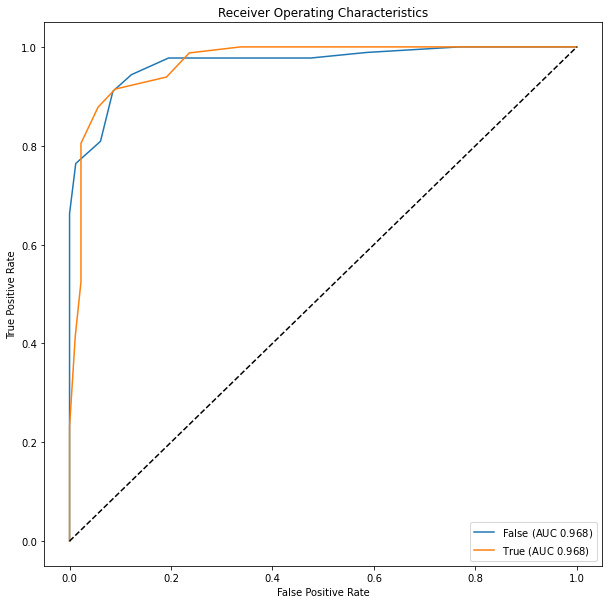

In [124]:
lucem_illud_2020.plotMultiROC(clf_knearest, test_data_df)

In [125]:
lucem_illud_2020.evaluateClassifier(clf_knearest, test_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.087719,0.910935,0.893617,0.872654,0.943820
True,0.087719,0.910935,0.935065,0.879512,0.878049


In [127]:
test_data_df['knn_predict'] = clf_knearest.predict(np.stack(test_data_df['vect'], axis=0))
print('Precision:', sklearn.metrics.precision_score(test_data_df['category'], test_data_df['knn_predict']))
print('Recall:', sklearn.metrics.recall_score(test_data_df['category'], test_data_df['knn_predict']))
print('F1:', sklearn.metrics.f1_score(test_data_df['category'], test_data_df['knn_predict']))
print('AUC:', sklearn.metrics.roc_auc_score(test_data_df['category'], test_data_df['knn_predict']))

Precision: 0.935064935064935
Recall: 0.8780487804878049
F1: 0.9056603773584906
AUC: 0.910934502603453


We could see that all other metrics are better than those of the models we had seen till now.

We have not seen k-means clustering yet (I think it will be in week 5, guessing from the syllabus), but I will elaborate on the difference between the k-means clustering and KNN based on my knowledge. KNN and k-means are similar in a way that they use distance metrics to identify neighbors. However, they are quite distinct because KNN is a supervised method that tries to estimate/classify the response value, while k-means is a unsupervised method that tries to identify clsuters in the data set by grouping points that are close to each other.

## <span style="color:red">*Exercise 5*</span>

<span style="color:red">In the cells immediately following, perform a neural network classification and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). How does this classify relevant to *k*-nearest neighbor, Naive Bayes, logistic and decision-tree approaches?

Again, I will continue to use the same dataset.

# SVMs

I will fit the SVC with the same parameters from the original notebook:

In [128]:
clf_svm = sklearn.svm.SVC(kernel='linear', probability = True)
clf_svm.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

Like always, let's start by visualizing the classification, ...

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


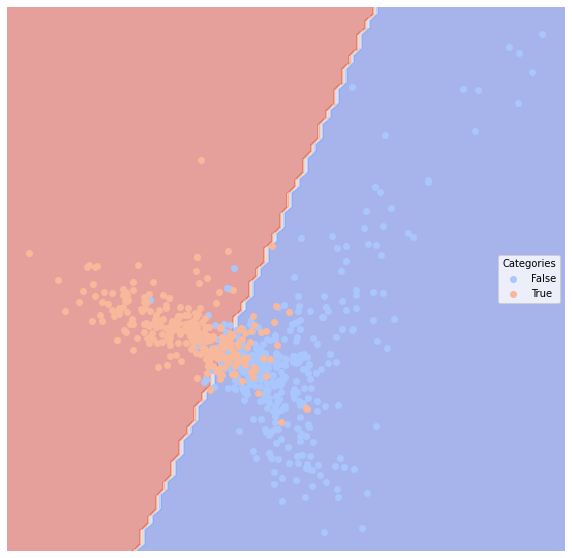

In [131]:
# training data
lucem_illud_2020.plotregions(clf_svm, train_data_df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


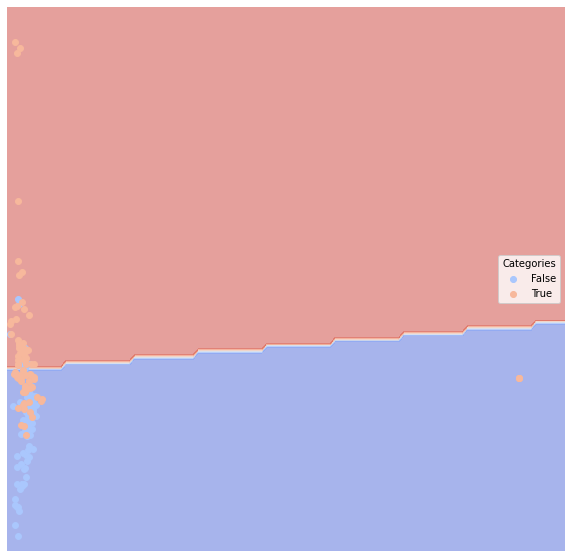

In [159]:
# testing data
lucem_illud_2020.plotregions(clf_svm, test_data_df)

..., the confusion matrix, ...

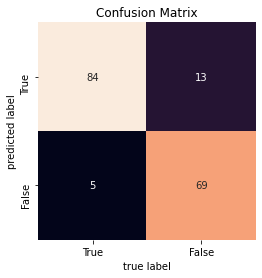

In [130]:
lucem_illud_2020.plotConfusionMatrix(clf_svm, test_data_df)

..., and the ROC:

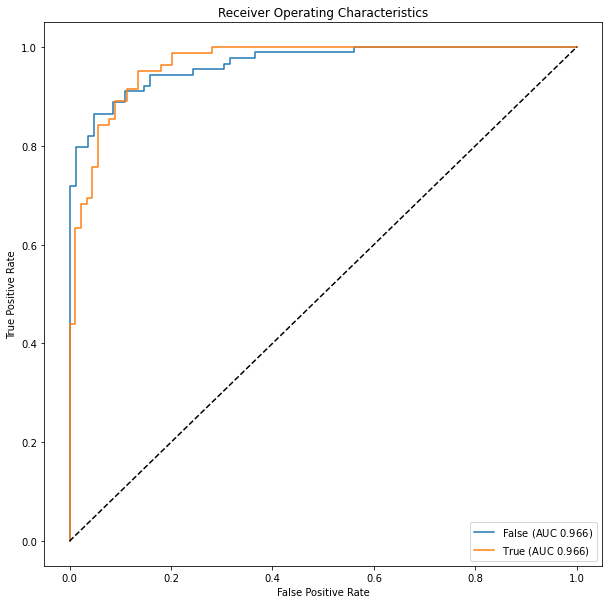

In [132]:
lucem_illud_2020.plotMultiROC(clf_svm, test_data_df)

We can calculate the train set/test set accuracy:

In [141]:
print("Training set ACC:", clf_svm.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print("Testing set ACC:", clf_svm.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

Training set ACC: 0.9927007299270073
Testing set ACC: 0.8947368421052632


We can see that while the training set accuracy is almost 100%, it does not generalize fully to the testing set. Perhaps overfitting could be an issue here, but it shows good performance.

Now let's look at other metrics, too:

In [129]:
lucem_illud_2020.evaluateClassifier(clf_svm, test_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.105263,0.892642,0.865979,0.846569,0.943820
True,0.105263,0.892642,0.932432,0.860631,0.841463


In [139]:
test_data_df['svm_predict'] = clf_svm.predict(np.stack(test_data_df['vect'], axis=0))
print('Precision:', sklearn.metrics.precision_score(test_data_df['category'], test_data_df['svm_predict']))
print('Recall:', sklearn.metrics.recall_score(test_data_df['category'], test_data_df['svm_predict']))
print('F1:', sklearn.metrics.f1_score(test_data_df['category'], test_data_df['svm_predict']))
print('AUC:', sklearn.metrics.roc_auc_score(test_data_df['category'], test_data_df['svm_predict']))

Precision: 0.9324324324324325
Recall: 0.8414634146341463
F1: 0.8846153846153847
AUC: 0.8926418196766237


We can see that the AUC is great, but I do note that it is less than simple KNN.

# Neural Nets

Finally, I will fit the neural nets:

In [134]:
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Let's visualize the classification:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


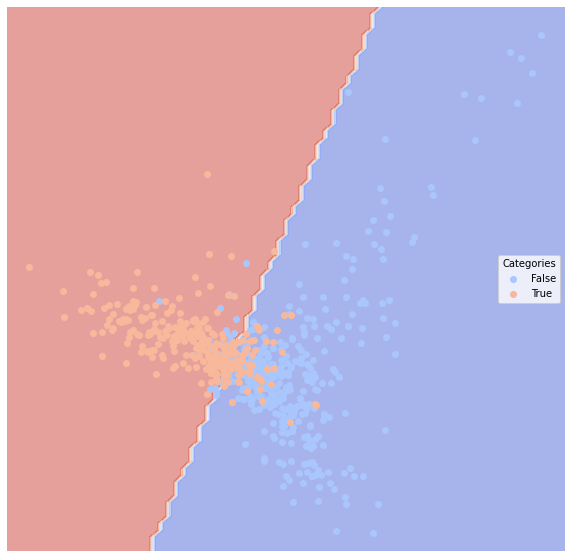

In [135]:
# training data
lucem_illud_2020.plotregions(clf_nn, train_data_df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


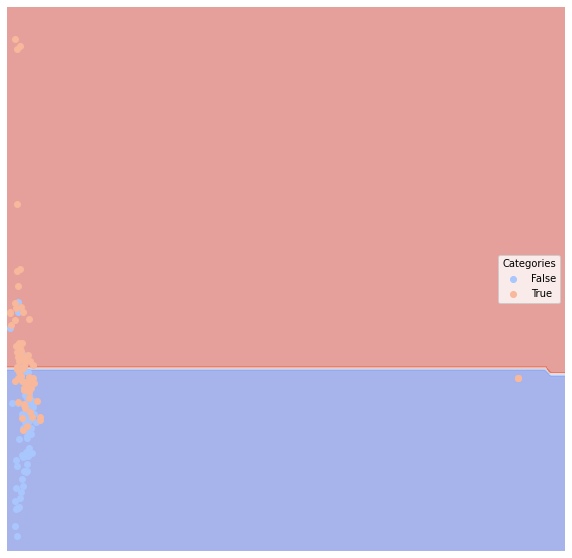

In [160]:
# test data
lucem_illud_2020.plotregions(clf_nn, test_data_df)

Interestingly, although this is a complicated classifier who can learn non-linear boundary, the boundary seems to be quite linear. Let's look at the confusion matrix and ROC too:

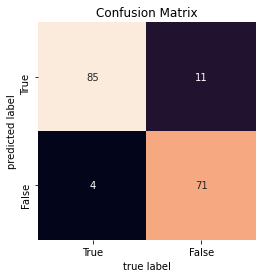

In [137]:
lucem_illud_2020.plotConfusionMatrix(clf_nn, test_data_df)

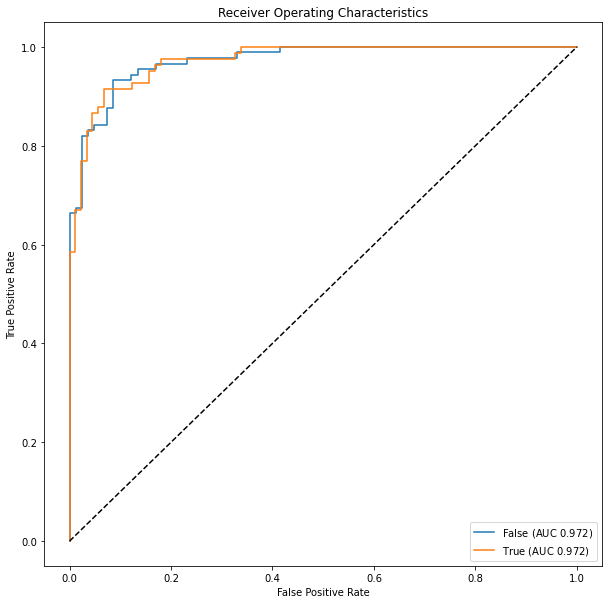

In [138]:
lucem_illud_2020.plotMultiROC(clf_nn, test_data_df)

Let's take a look at accuracy and other metrics:

In [142]:
print("Training set ACC:", clf_nn.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print("Testing set ACC:", clf_nn.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

Training set ACC: 0.9956204379562044
Testing set ACC: 0.9122807017543859


In [136]:
lucem_illud_2020.evaluateClassifier(clf_nn, test_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.087719,0.910455,0.885417,0.869014,0.955056
True,0.087719,0.910455,0.946667,0.884002,0.865854


In [140]:
test_data_df['nn_predict'] = clf_nn.predict(np.stack(test_data_df['vect'], axis=0))
print('Precision:', sklearn.metrics.precision_score(test_data_df['category'], test_data_df['nn_predict']))
print('Recall:', sklearn.metrics.recall_score(test_data_df['category'], test_data_df['nn_predict']))
print('F1:', sklearn.metrics.f1_score(test_data_df['category'], test_data_df['nn_predict']))
print('AUC:', sklearn.metrics.roc_auc_score(test_data_df['category'], test_data_df['nn_predict']))

Precision: 0.9466666666666667
Recall: 0.8658536585365854
F1: 0.9044585987261147
AUC: 0.910454919155933


We can see it performed quite well, but its performance looks similar to that of KNN. Taking the simple-is-best approach, perhaps KNN is the best classifier for this dataset.

Neural Nets relate to other classifiers in a way that its high flexibility allows it to show similar patterns with other classifiers. For example, if logistic regression is the best approach, neural nets could mimic the method of logistic regression and so on. This is because unlike other classifiers, Neural Nets are able to utilize latent variable that the researcher did not explicitly fed into the model.

## Extra - for fun

Finally, I was really curious what abstract that every single one of the classifier missed. There were three instances:

In [151]:
test_data_df[(test_data_df['category'] != test_data_df['logistic_predict']) &
(test_data_df['category'] != test_data_df['nb_predict']) &
(test_data_df['category'] != test_data_df['tree_predict']) &
(test_data_df['category'] != test_data_df['bag_predict']) &
(test_data_df['category'] != test_data_df['rf_predict']) &
(test_data_df['category'] != test_data_df['knn_predict']) &
(test_data_df['category'] != test_data_df['svm_predict']) &
(test_data_df['category'] != test_data_df['nn_predict'])]

,text,category,tokenized_text,normalized_text,vect,pca,pca_reduced_10,logistic_predict,nb_predict,tree_predict,bag_predict,rf_predict,knn_predict,svm_predict,nn_predict
170,Although euphemisms are intended to put a more...,True,"[Although, euphemisms, are, intended, to, put,...","[euphemism, intend, positive, spin, word, repl...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0023018390688806277, 0.007352924074453587,...","[-0.0023018390688806277, 0.007352924074453587,...",False,False,False,False,False,False,False,False
360,"Comparability, Stability, and Reliability of I...",True,"[Comparability, Stability, and, Reliability, o...","[comparability, stability, reliability, intern...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.009742756509629781, -0.03330665158962789, -...","[0.009742756509629781, -0.03330665158962789, -...",False,False,False,False,False,False,False,False
255,Engagement in leisure activities has been clai...,True,"[Engagement, in, leisure, activities, has, bee...","[engagement, leisure, activity, claim, highly,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.005899384285924186, -0.022560060728034133, ...","[0.005899384285924186, -0.022560060728034133, ...",False,False,False,False,False,False,False,False


In [150]:
list(test_data_df[(test_data_df['category'] != test_data_df['logistic_predict']) &
(test_data_df['category'] != test_data_df['nb_predict']) &
(test_data_df['category'] != test_data_df['tree_predict']) &
(test_data_df['category'] != test_data_df['bag_predict']) &
(test_data_df['category'] != test_data_df['rf_predict']) &
(test_data_df['category'] != test_data_df['knn_predict']) &
(test_data_df['category'] != test_data_df['svm_predict']) &
(test_data_df['category'] != test_data_df['nn_predict'])]['text'])

['Although euphemisms are intended to put a more positive spin on the words they replace, some euphemisms are ineffective. Our study examined the effectiveness of a popular euphemism for persons with disabilities, special needs. Most style guides prescribe against using the euphemism special needs and recommend instead using the non-euphemized term disability; disability advocates argue adamantly against the euphemism special needs, which they find offensive. In contrast, many parents of children with disabilities prefer to use special needs rather than disability. But no empirical study has examined whether special needs is more or less positive than the term it replaces. Therefore, we gathered a sample of adult participants from the general population (N = 530) and created a set of vignettes that allowed us to measure how positively children, college students, and middle-age adults are viewed when they are described as having special needs, having a disability, having a certain disab

Personally, I would have claimed that the first two does not belong to neither "Cognitive Psychology" or "Social and Personality Psychology" if I had to annotate the data. For the third one, I would actually say this belongs to "Social and Personality Psychology" than "Cognitive Psychology", actually agreeing with the models rather than the authors.